In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_ind
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
df = pd.read_csv('C:\\Users\\havenkai\\Documents\\People Analytics Scorecard\\DataFile.csv')

#Added a new function - consistent number format$
def format_change(value):
    try:
        if isinstance(value, str) and '%' in value:
            value = value.replace('%', '')
        value = float(value)
        return f"{value:.2f}%"
    except:
        return "0.00%"
#df[['% OT']]= df[['% OT']].astype(float)
# Convert percentage columns to float

#Year & Month conversion$
df['Year Month'] = df['Year Month'].astype(str).str.strip().str.replace('-', '').astype(int)

#Added all the columns from the new 'DataFile'$
columns_to_format=['Production Attrition % (0-45 days tenure)','Production AA Attrition %',
                   'Production SA Attrition %','Unregretted Attrition %',
                   'Job Abandonment %','Production Negative UPT %',
                   'LBI - Effective Communication','LBI - Competence and Decision Making',
                   'LBI - Empowering Employees','Leadership Opportunity Index(LOI)',
                   'All Incident Rate','D1MO Training Completion %',
                   'Leadership Behavior Index (LBI)','SLI 3.0','Job Satisfaction Score (Connections)']

#Converted all aforementioned columns from string to float data types$
df[columns_to_format]=df[columns_to_format].applymap(format_change)

for col in df.columns:
    if df[col].dtype == 'object' and '%' in df[col].iloc[0]:
        df[col] = df[col].str.rstrip('%').astype('float') / 100.0

# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(include='object').columns
print("Columns with non-numeric values:", non_numeric_cols)
df.drop(columns=non_numeric_cols, inplace=True)

Columns with non-numeric values: Index([], dtype='object')


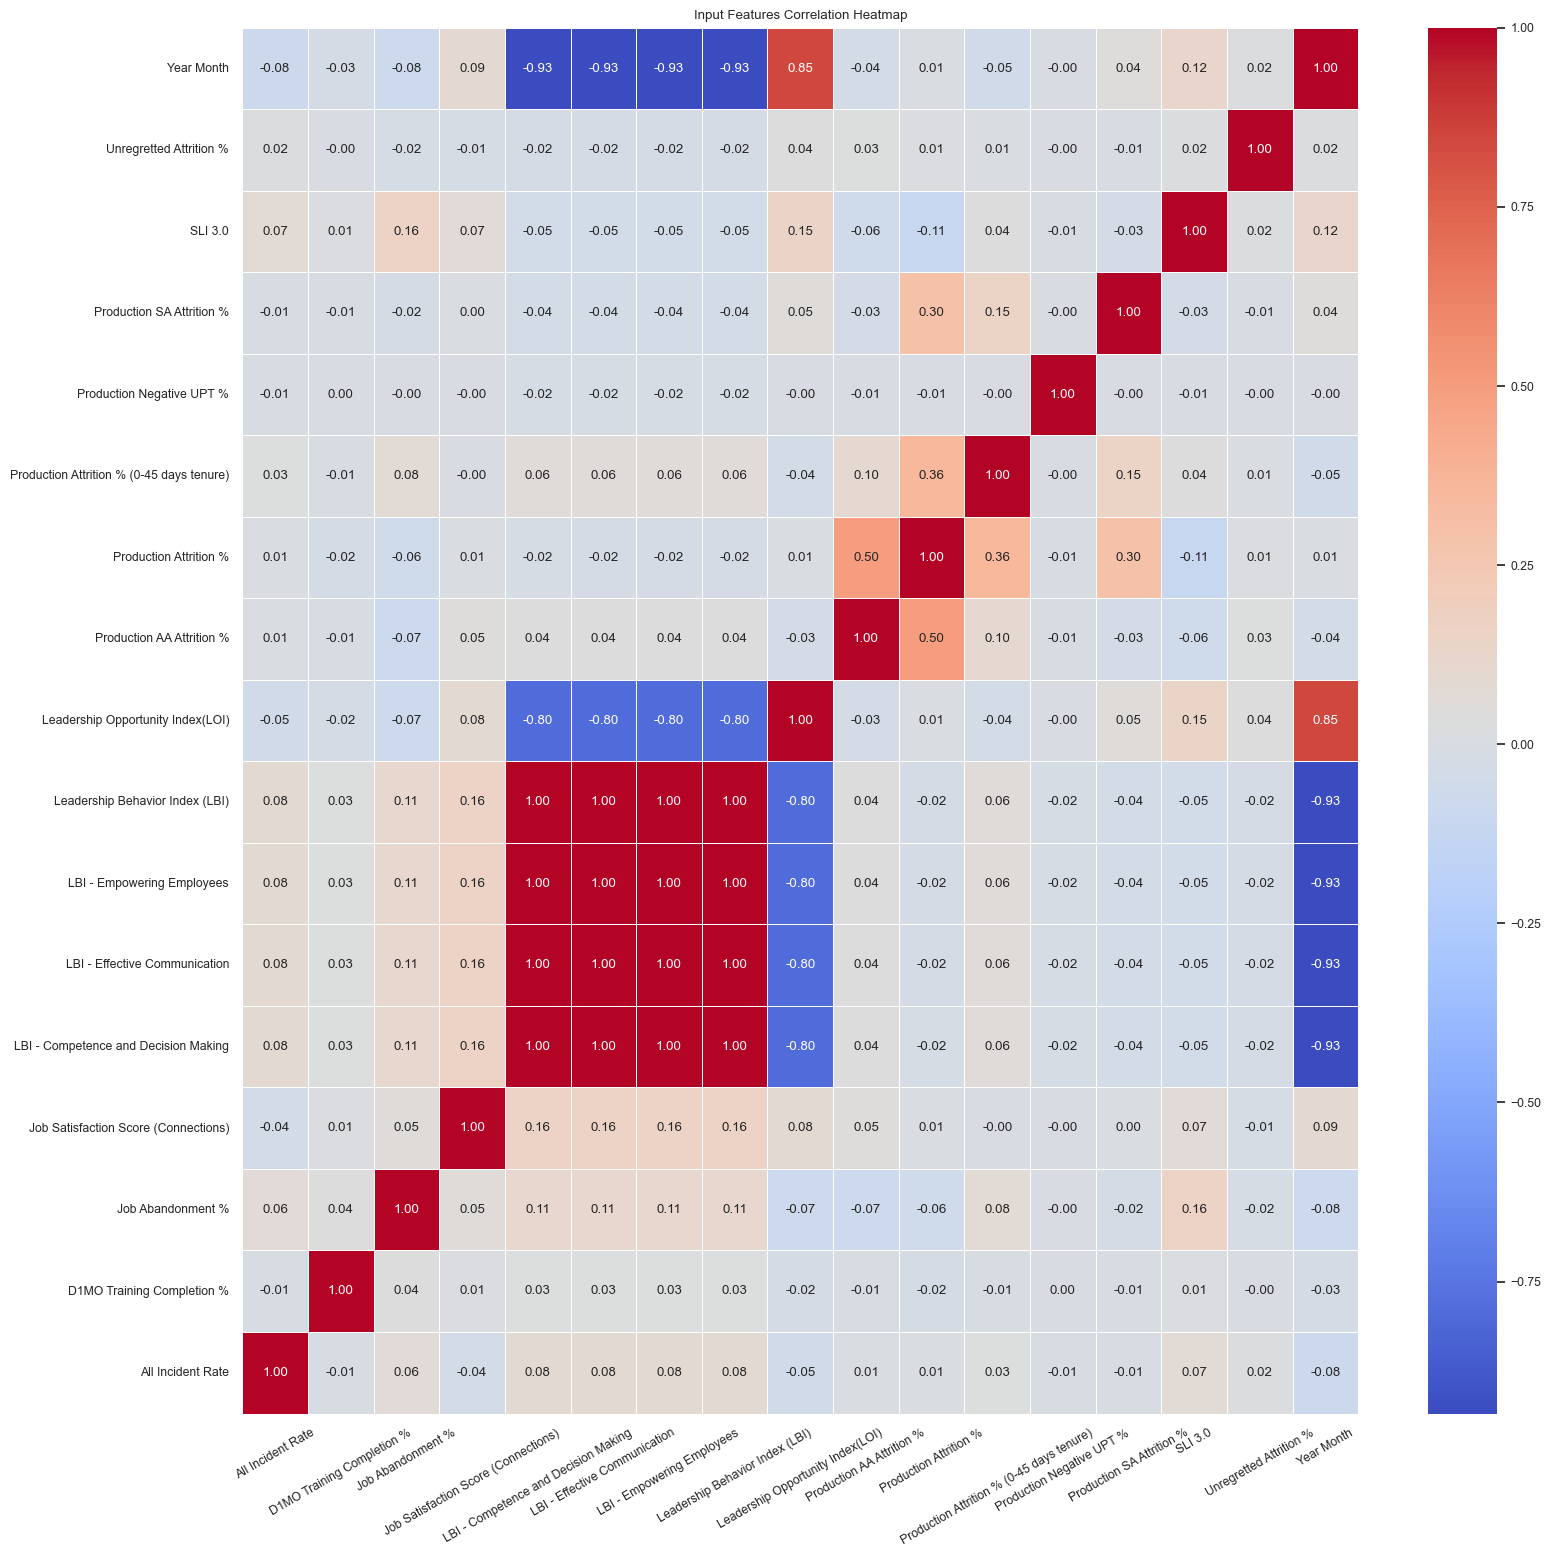

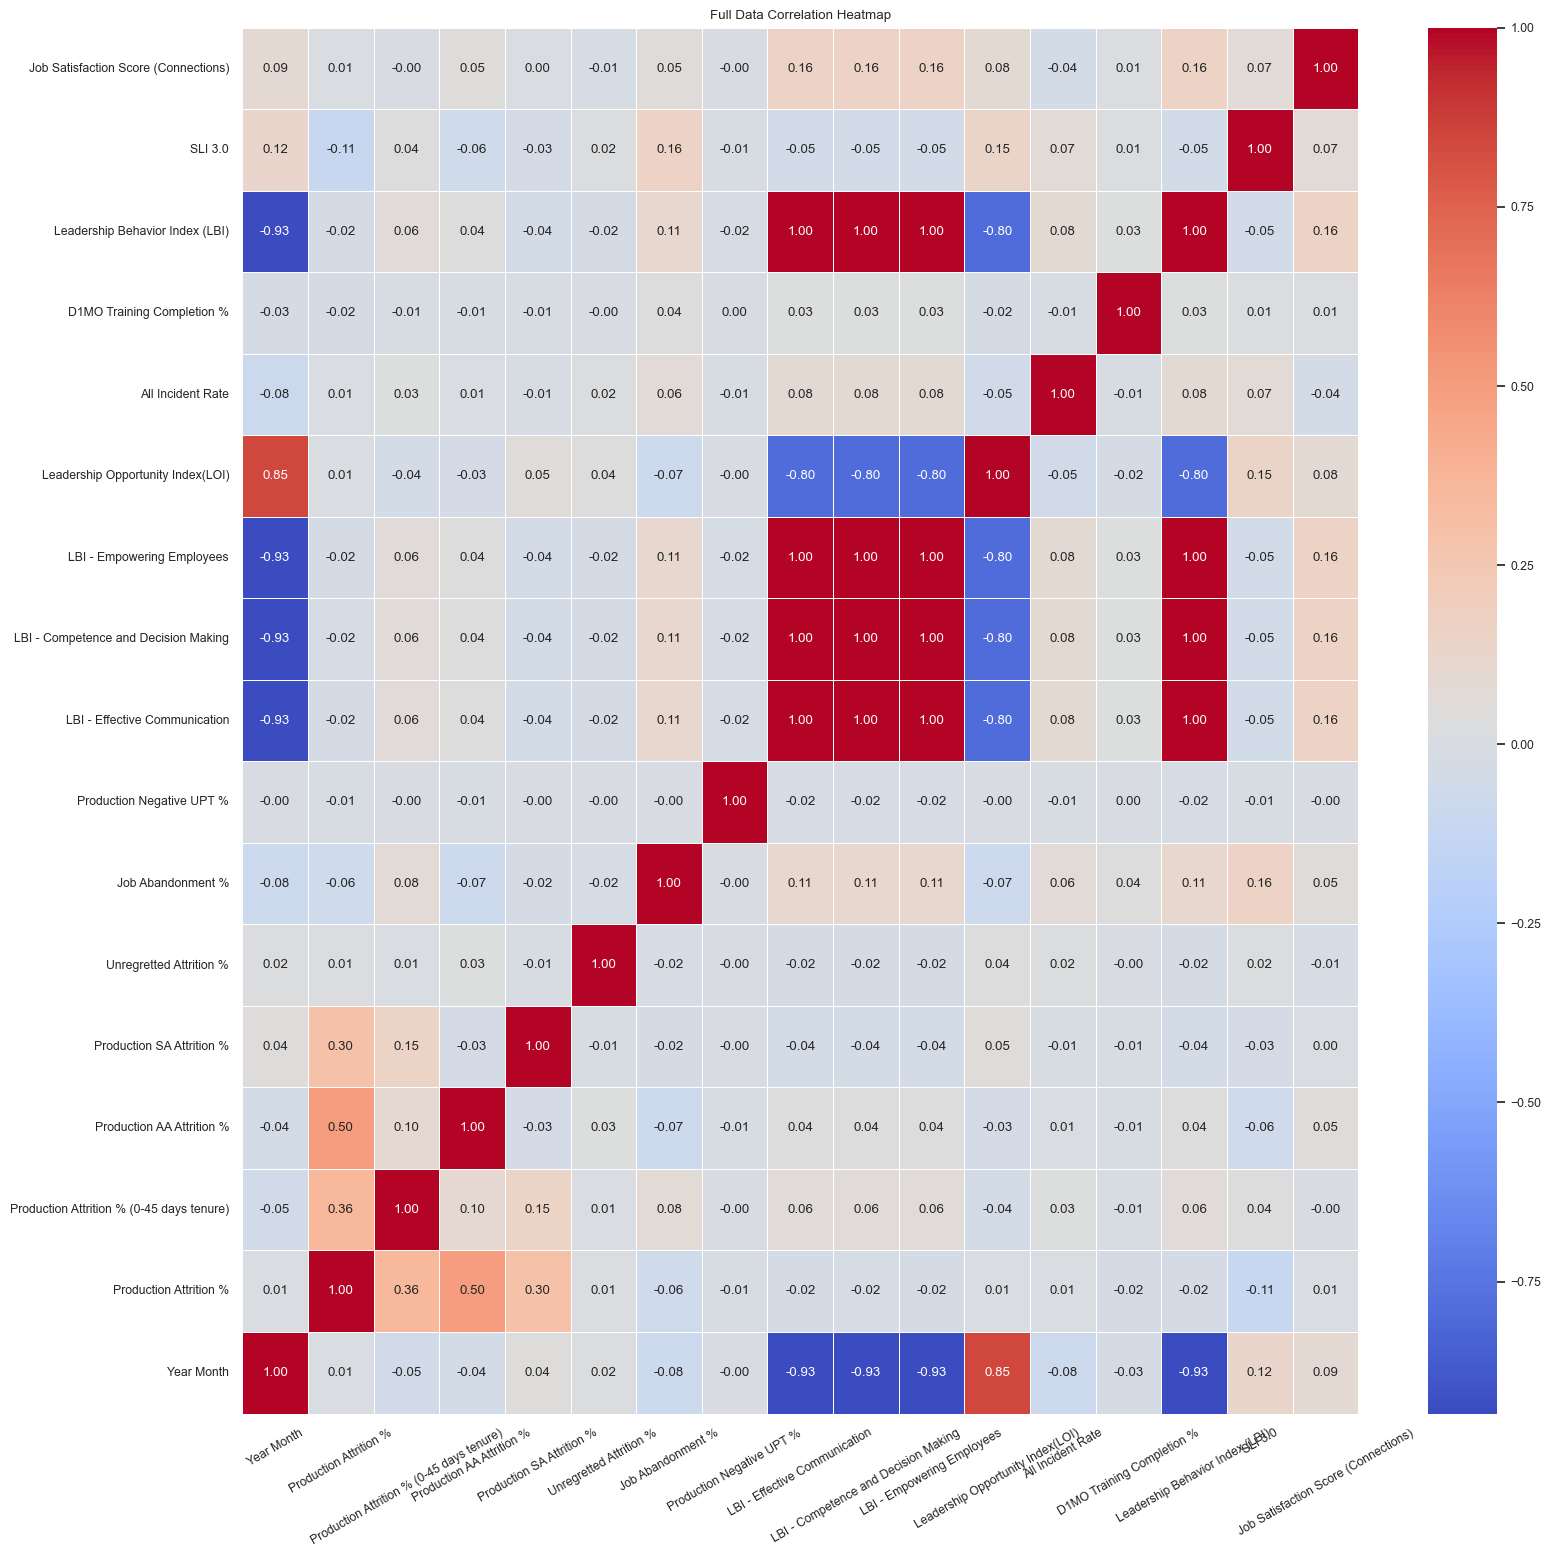

Explained variation per principal component: [0.73247723 0.06933222 0.03107381 0.02895397 0.02706952 0.0242703
 0.02375427 0.02110288 0.01608308 0.01446029]


In [21]:
# Normalize the input values as a DF
features = df.columns.difference(['Month'])
Book1_data_inputs = df[features].values
Book1_data_inputs_and_output = df.values

# Normalized DF
Book1_inputs_norm_df = pd.DataFrame(scale(Book1_data_inputs), columns=features)
Book1_inputs_and_output_norm_df = pd.DataFrame(scale(Book1_data_inputs_and_output), columns=df.columns)

# Correlation of the Normalized DF
Book1_inputs_norm_df_corr = Book1_inputs_norm_df.corr(method="pearson")
Book1_inputs_and_output_norm_df_corr = Book1_inputs_and_output_norm_df.corr(method="pearson")

# Create a correlation heatmap for both DFs
corr_data = [
    (Book1_inputs_norm_df_corr, "Input Features Correlation Heatmap"),
    (Book1_inputs_and_output_norm_df_corr, "Full Data Correlation Heatmap")
]

for corr_df, title in corr_data:
    plt.figure(figsize=(18, 18))
    sns.set(font_scale=0.8)
    heatmap = sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.4)
    heatmap.invert_yaxis()
    plt.title(title)
    plt.xticks(rotation=30)
    plt.show()
# Run PCA and get components as ["C1", "C2", ...]
PCA_n_components = 10
Book1_pca = PCA(n_components=PCA_n_components)
PrincipalComponents_Book1 = Book1_pca.fit_transform(Book1_inputs_norm_df_corr)
PrincipalComponents_Book1_df = pd.DataFrame(data=PrincipalComponents_Book1,
                                           columns=["C" + str(i) for i in range(1, PCA_n_components+1)],
                                           index=Book1_inputs_norm_df_corr.index)
Book1_pca_explained_ratio = Book1_pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(Book1_pca_explained_ratio))

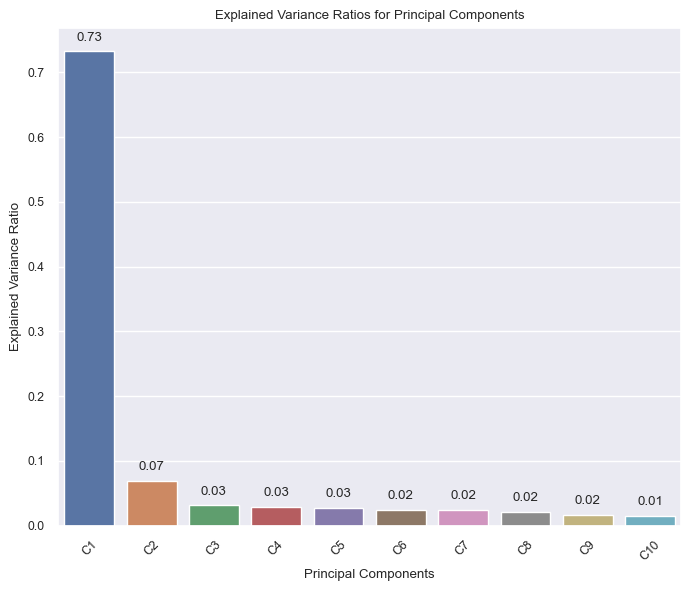

In [3]:
# Bar chart: Variables' contribution to principal components
import seaborn as sns

# Assuming Book1_pca_explained_ratio and PCA_n_components are already defined

# Data Preparation for Seaborn
df_pca = pd.DataFrame({
    'Principal Components': ["C" + str(i) for i in range(1, PCA_n_components+1)],
    'Explained Variance Ratio': Book1_pca_explained_ratio
})

# Create the Bar chart using Seaborn
plt.figure(figsize=(7, 6))
ax = sns.barplot(x='Principal Components', y='Explained Variance Ratio', data=df_pca)

# Annotating the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Setting labels and title
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratios for Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

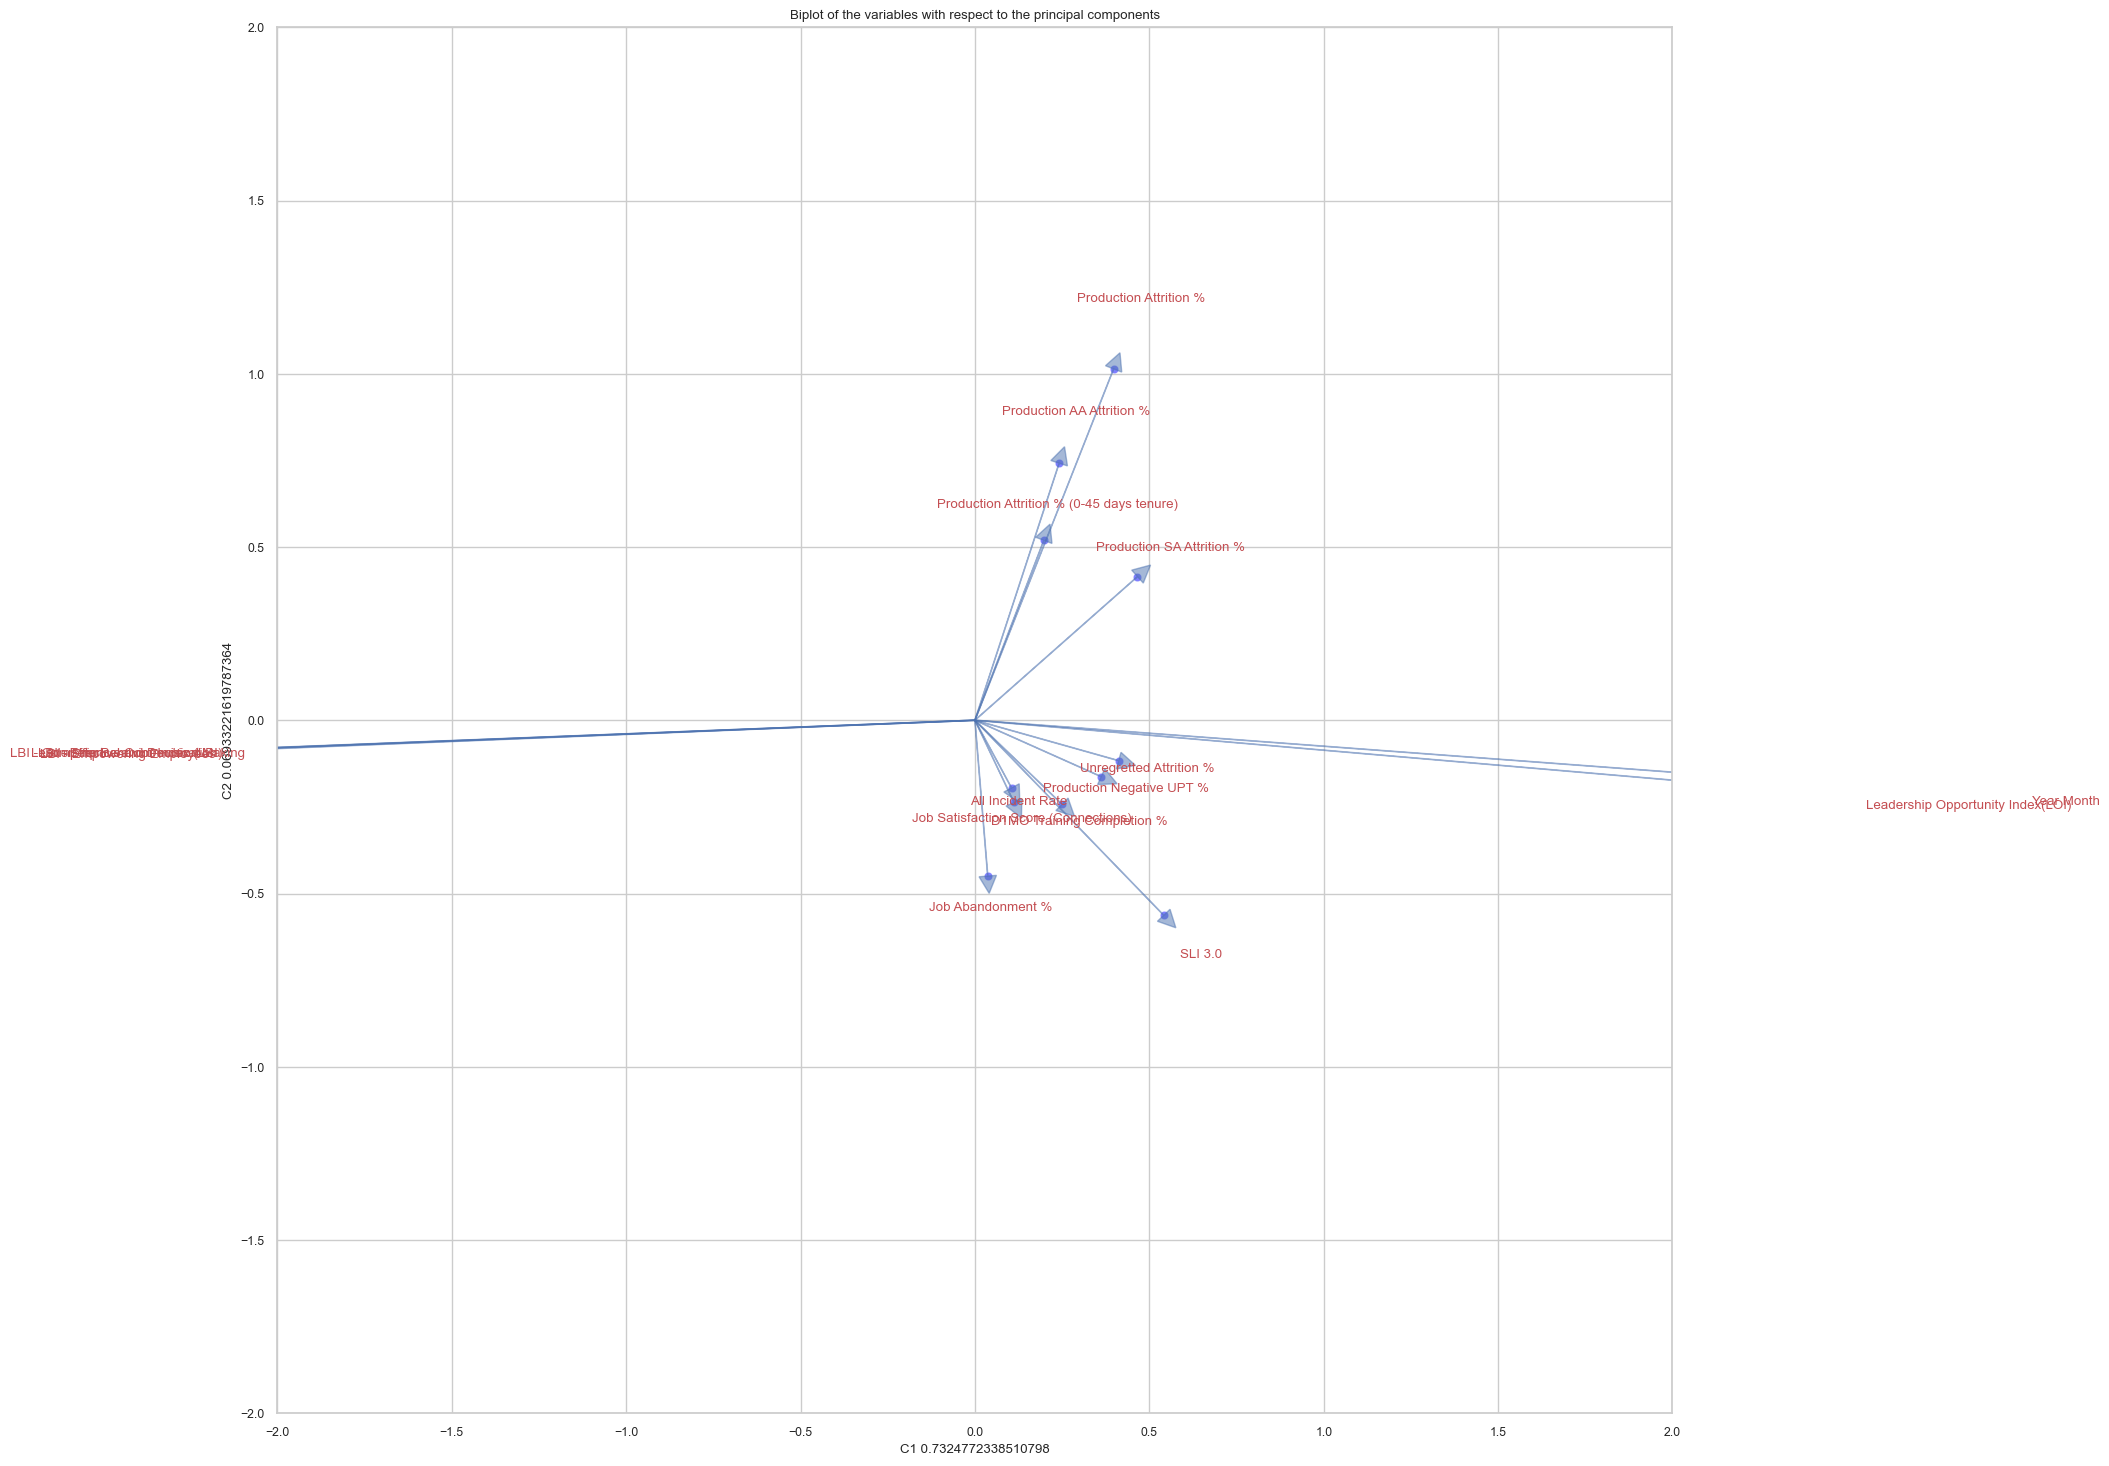

end


In [4]:
# Setting the style
sns.set_style("whitegrid")

plt.figure(figsize=(18, 18))

# Scatter plot using Seaborn
sns.scatterplot(x='C1', y='C2', data=PrincipalComponents_Book1_df, color='blue', alpha=0.5)

# Adding arrows and annotations using Matplotlib
for i in PrincipalComponents_Book1_df.index:
    plt.arrow(0, 0, PrincipalComponents_Book1_df.loc[i, "C1"], PrincipalComponents_Book1_df.loc[i, "C2"], color='b',
              alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(PrincipalComponents_Book1_df.loc[i, "C1"] * 1.2, PrincipalComponents_Book1_df.loc[i, "C2"] * 1.2,
             str(i), color='r', ha='center', va='center')

# Setting labels, limits, and title
plt.xlabel('C1 '+ str(Book1_pca_explained_ratio[0]))
plt.ylabel('C2 '+ str(Book1_pca_explained_ratio[1]))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Biplot of the variables with respect to the principal components')

plt.show()

print("end")

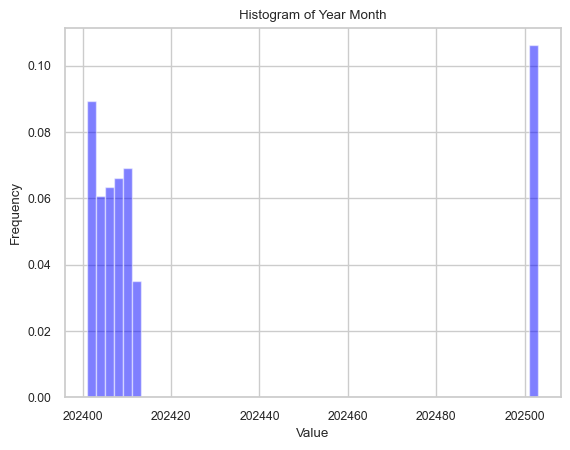

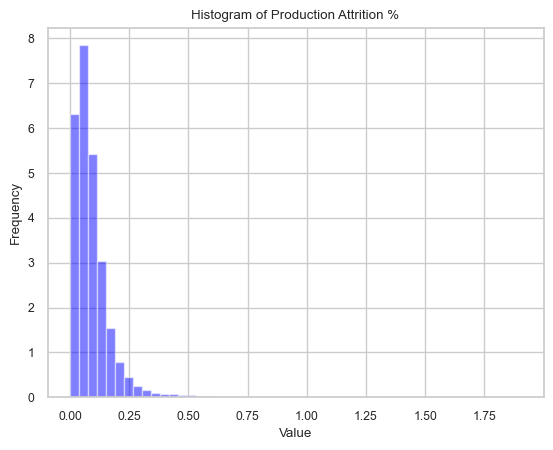

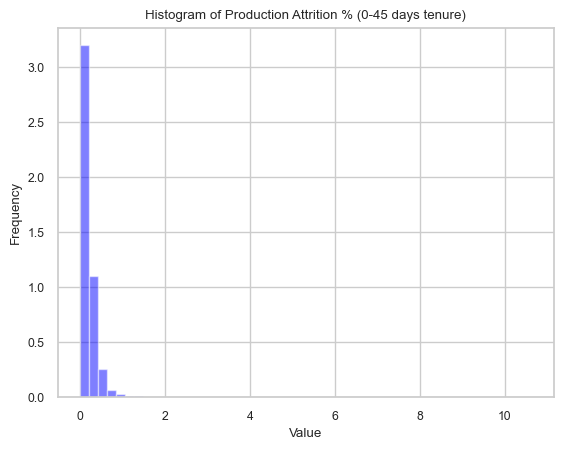

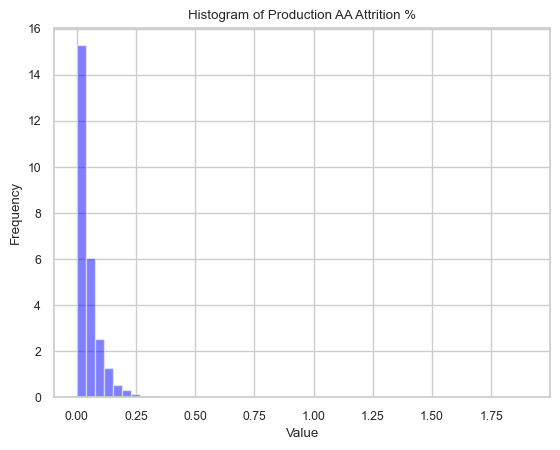

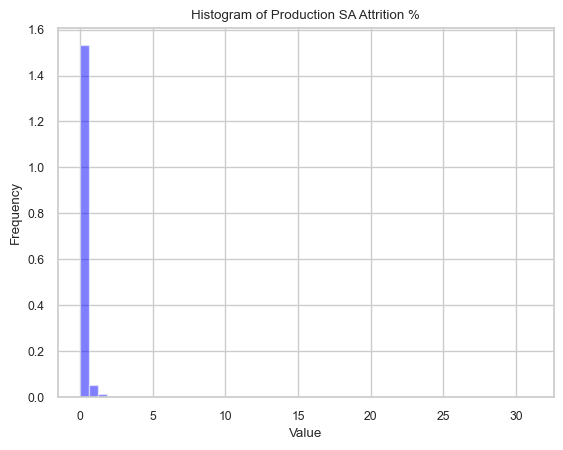

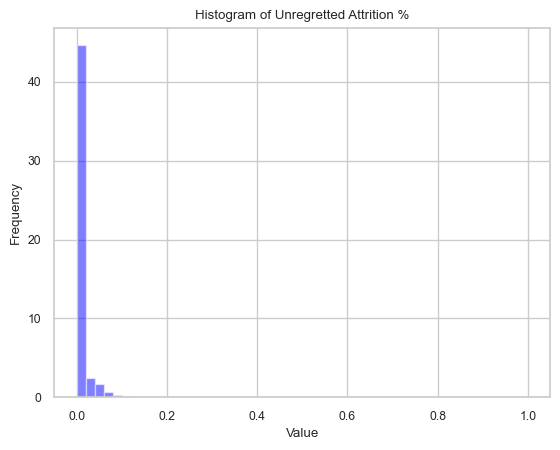

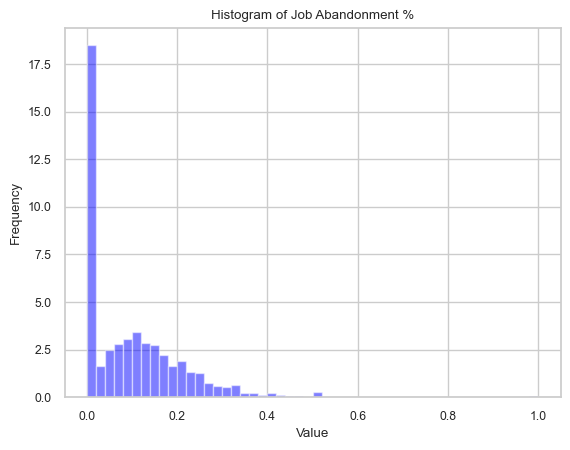

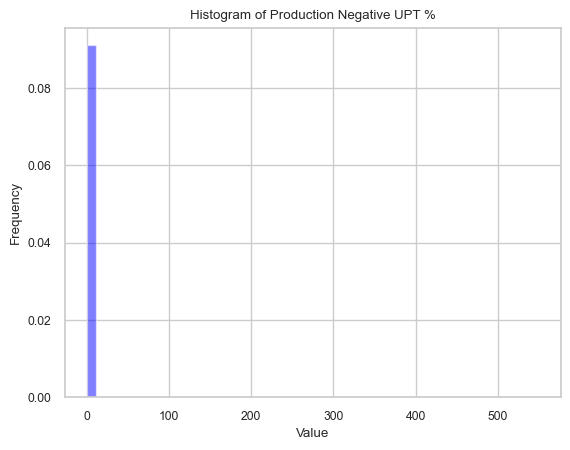

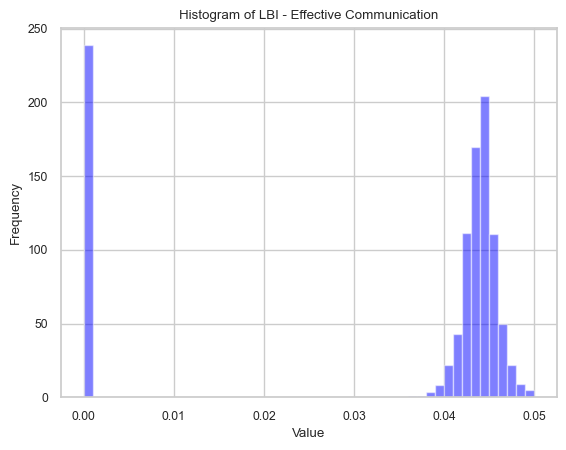

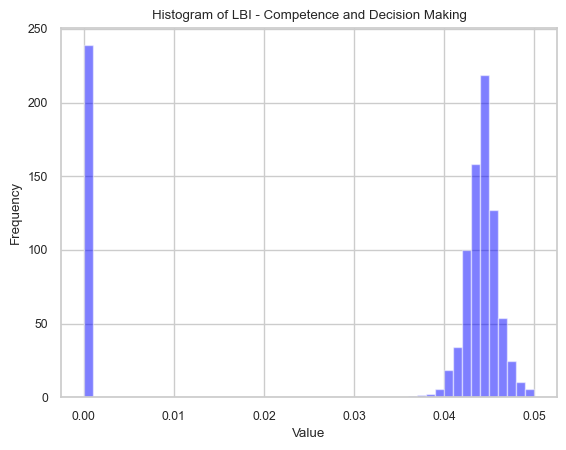

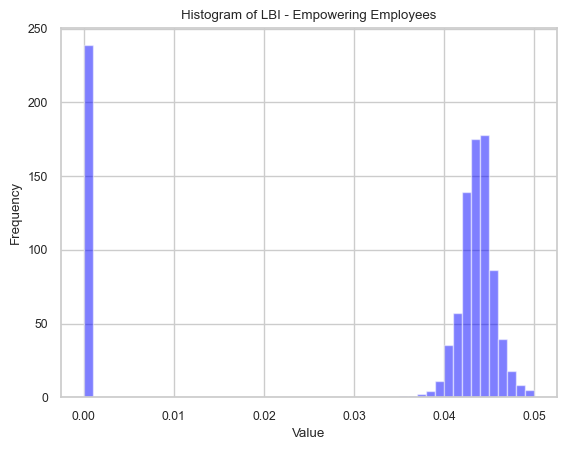

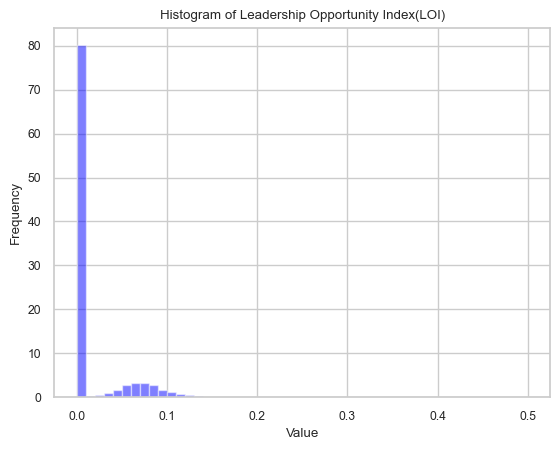

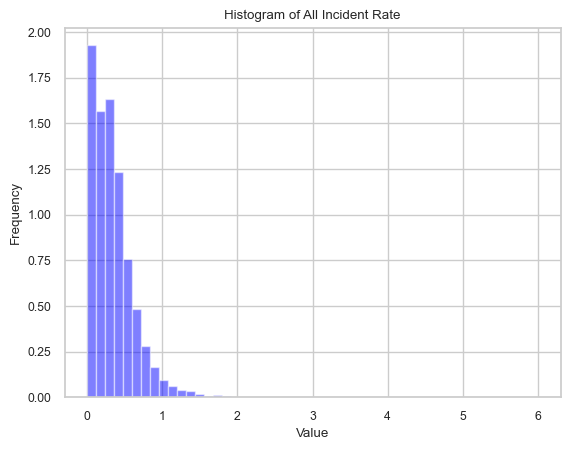

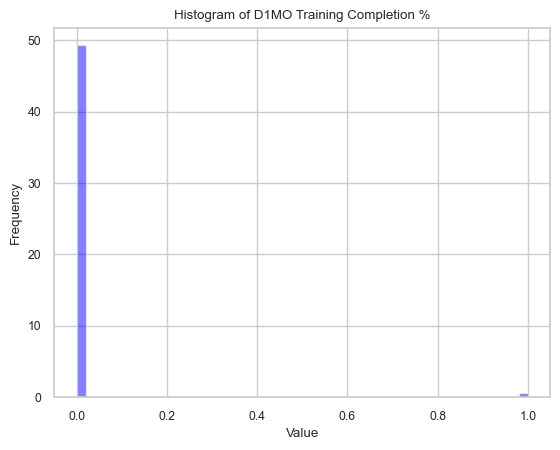

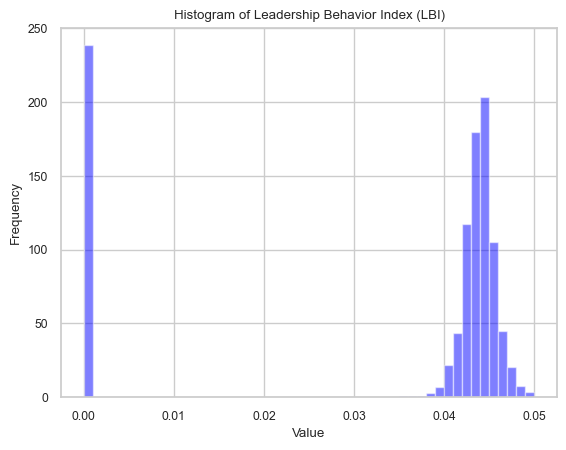

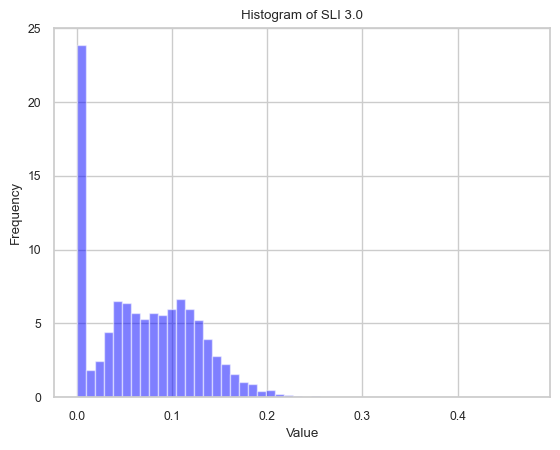

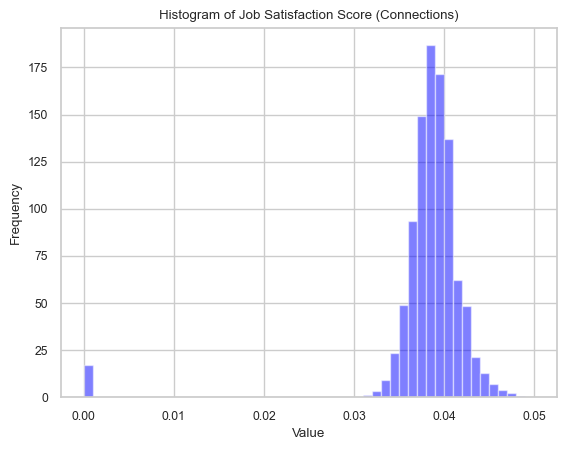

T-test between Production Attrition and Year Month: p-value = 0.0
T-test between Production Attrition and Production Attrition %: p-value = 1.0
T-test between Production Attrition and Production Attrition % (0-45 days tenure): p-value = 7.298658779905666e-281
T-test between Production Attrition and Production AA Attrition %: p-value = 0.0
T-test between Production Attrition and Production SA Attrition %: p-value = 3.5691560158027814e-188
T-test between Production Attrition and Unregretted Attrition %: p-value = 0.0
T-test between Production Attrition and Job Abandonment %: p-value = 6.123168903105346e-17
T-test between Production Attrition and Production Negative UPT %: p-value = 0.8891355062162293
T-test between Production Attrition and LBI - Effective Communication: p-value = 0.0
T-test between Production Attrition and LBI - Competence and Decision Making: p-value = 0.0
T-test between Production Attrition and LBI - Empowering Employees: p-value = 0.0
T-test between Production Attriti

In [5]:
# Define columns to exclude from testing
exclude_columns = ['Month']

for column in df.columns:
    if column not in exclude_columns:
        plt.hist(df[column], bins=50, density=True, alpha=0.5, color='blue')
        plt.title(f'Histogram of {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()


# Test for normality using Shapiro-Wilk test
# normality_test_results = {}
# for column in df.columns:
#     if column not in exclude_columns:
#         _, p_value = shapiro(df[column].dropna())
#         normality_test_results[column] = p_value
#
# # Columns that are normally distributed
# normally_distributed_columns = [column for column, p_value in normality_test_results.items() if p_value > 0.05]
# print(normally_distributed_columns)

# Perform t-tests for "Attrition" and "Attendance" with normally distributed columns
for column in df.columns:
    if column not in exclude_columns:
#Replaced 'Monthly EEI to Production Attrition%'$
        t_stat, p_value = ttest_ind(df['Production Attrition %'].fillna(0), df[column].fillna(0))
        print(f"T-test between Production Attrition and {column}: p-value = {p_value}")
#         t_stat, p_value = ttest_ind(df['Attendance'].fillna(0), df[column].fillna(0))
#         print(f"T-test between Attendance and {column}: p-value = {p_value}")

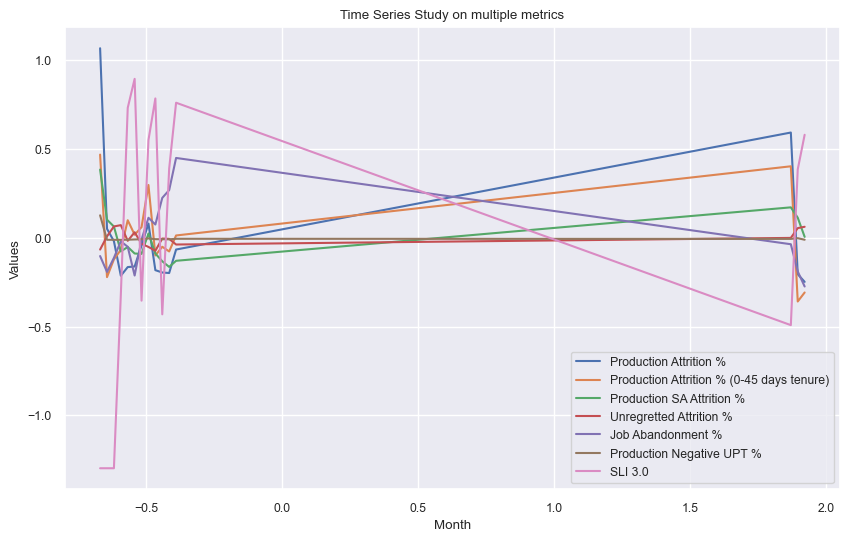

In [22]:
# Time Series Plotting
plt.figure(figsize=(10, 6))

#Replaced Month to Year Month$
for x_axis_name in ["Year Month"]:
#Replaced the previous 4 column names to the 7 new ones$
    for y_axis_name in ["Production Attrition %", "Production Attrition % (0-45 days tenure)","Production SA Attrition %", "Unregretted Attrition %","Job Abandonment %","Production Negative UPT %","SLI 3.0"]:
        average_value = Book1_inputs_and_output_norm_df.groupby(x_axis_name)[y_axis_name].mean().reset_index()
        plt.plot(average_value[x_axis_name], average_value[y_axis_name], label=y_axis_name)


# Plot for "Attrition"
# plt.scatter(df["Wk #"], df["Attrition"], label="Attrition", color="blue", marker="o")
# Plot for "EEO ranking"
# plt.scatter(df["Wk #"], df["EEO ranking"], label="EEO ranking", color="green", marker="s")
# Plot for "Negative VOA Comments %"
# plt.scatter(df["Wk #"], df["Negative VOA Comments %"], label="Negative VOA Comments %", color="red", marker="^")

# Add labels and legend
plt.xlabel("Month")
plt.ylabel("Values")
plt.title("Time Series Study on multiple metrics")
plt.legend()

# Show the plot
plt.show()

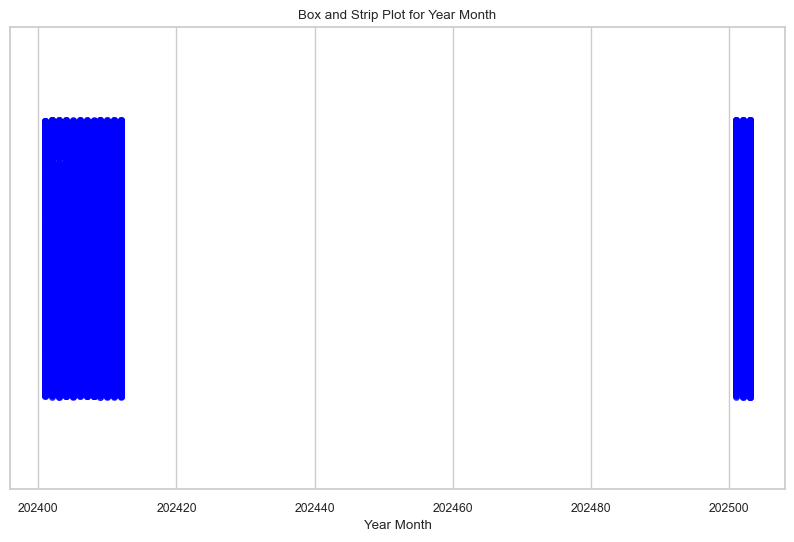

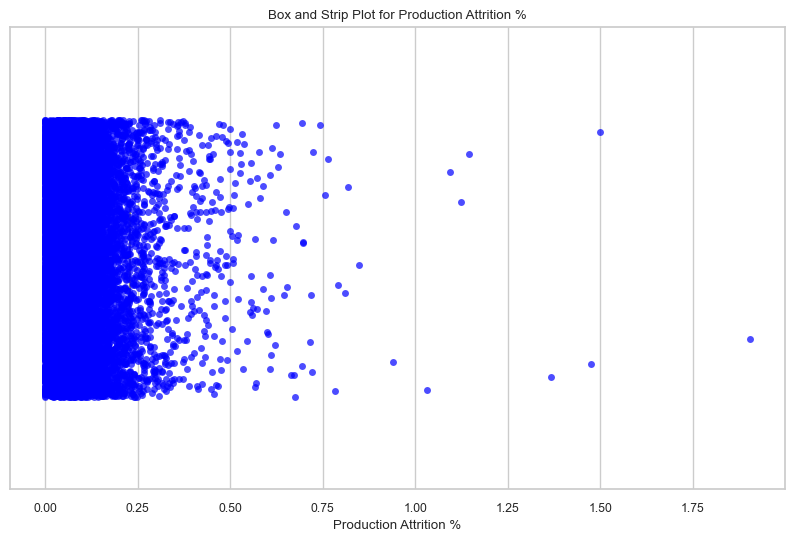

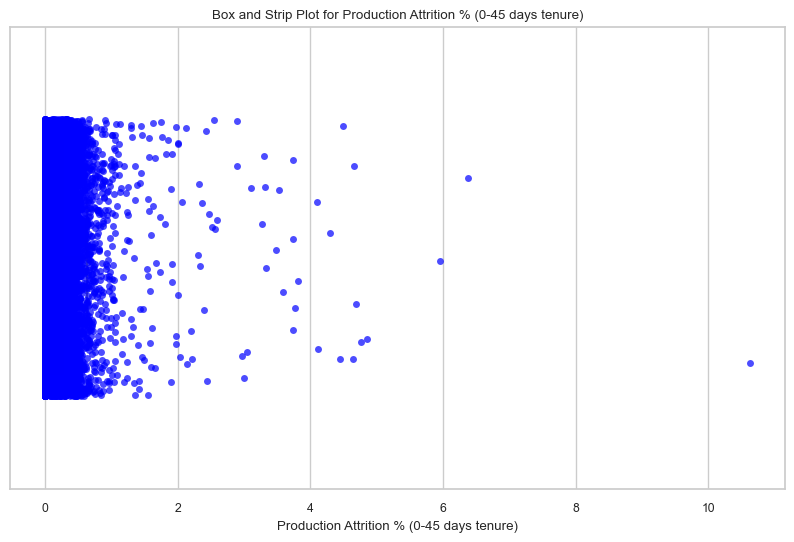

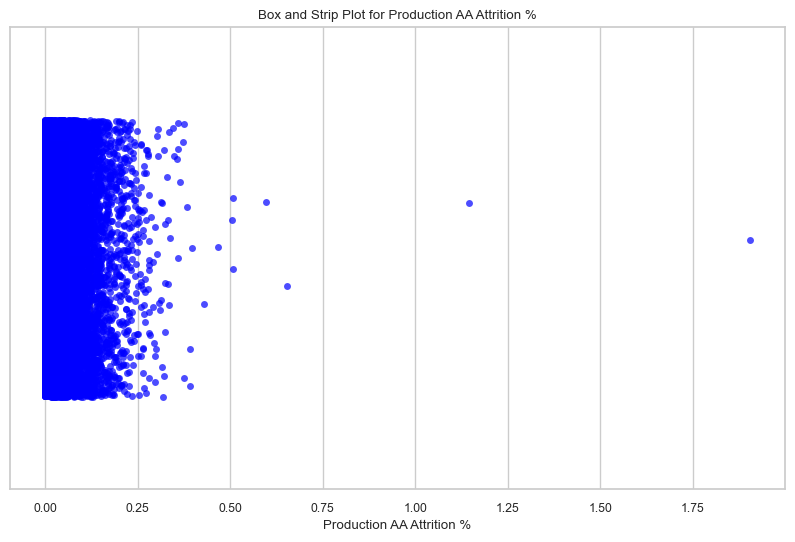

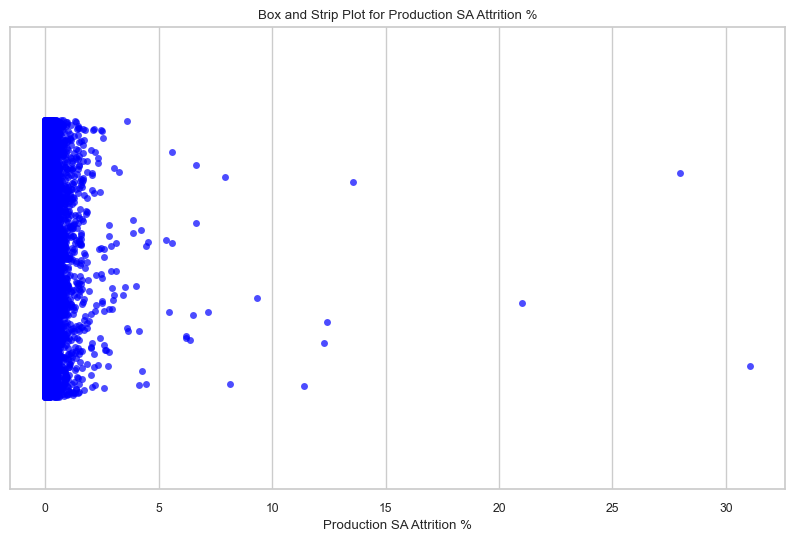

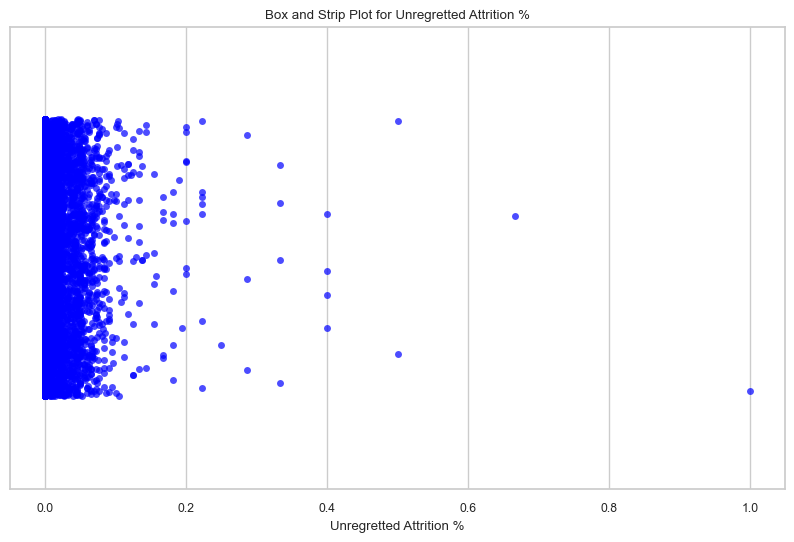

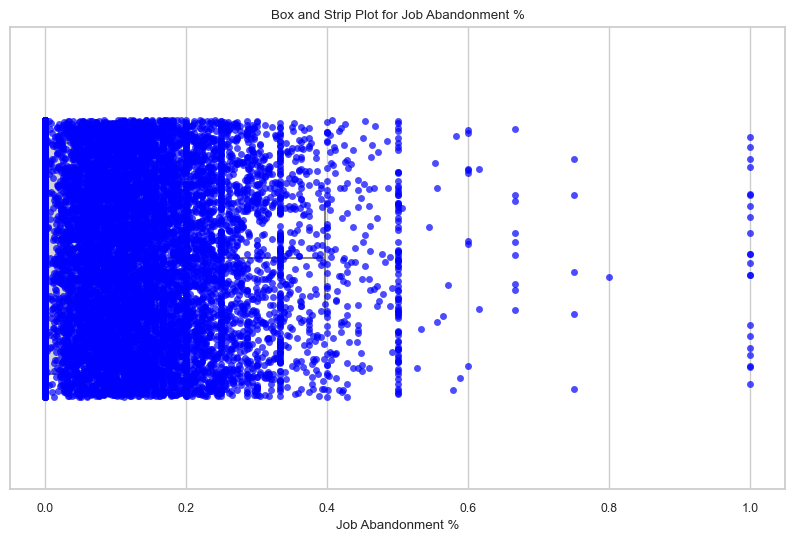

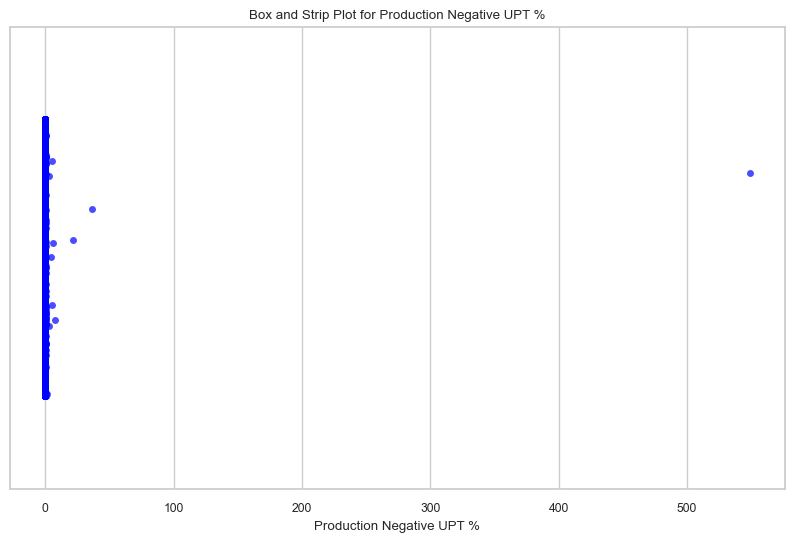

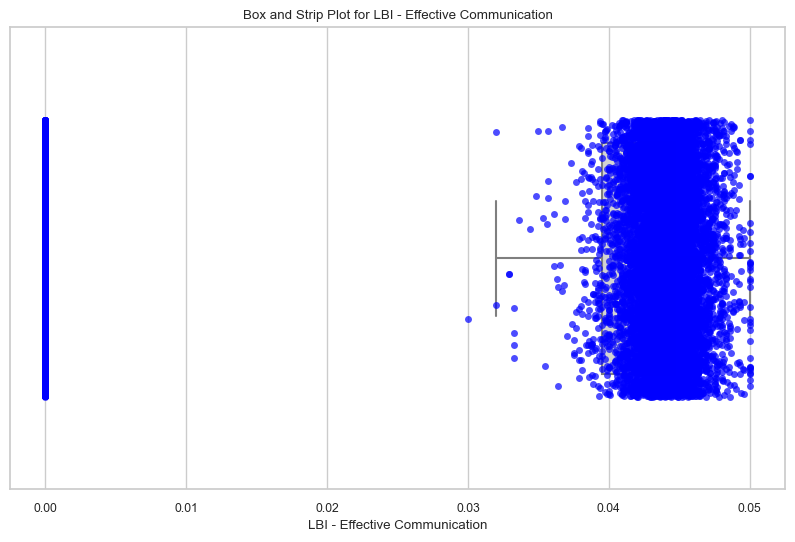

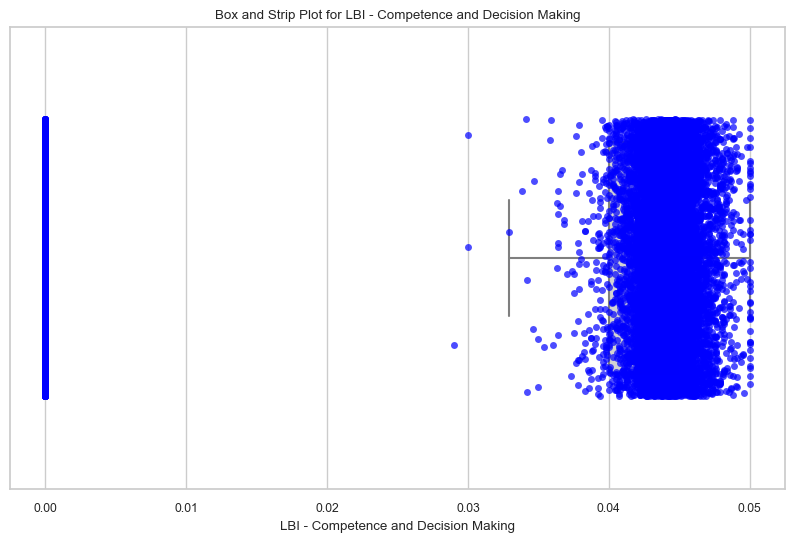

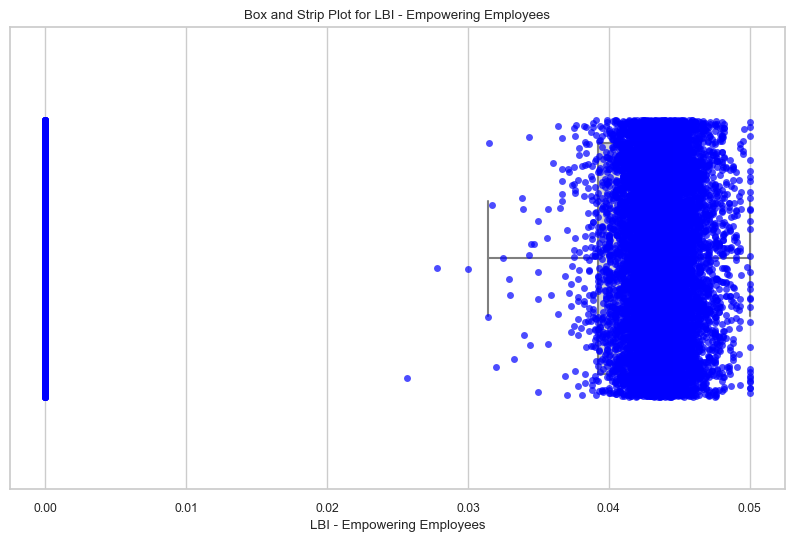

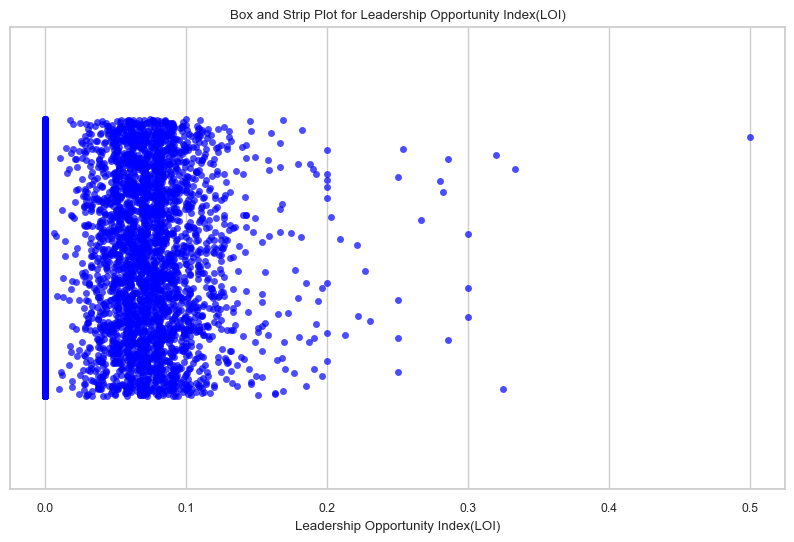

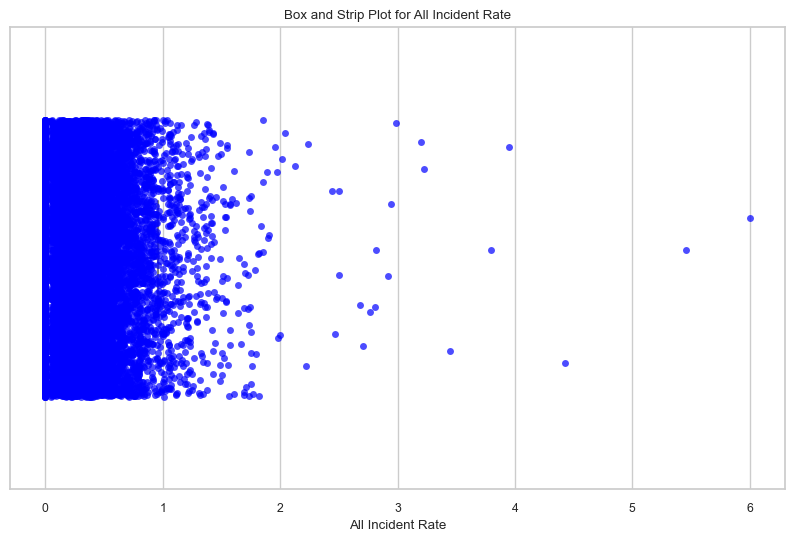

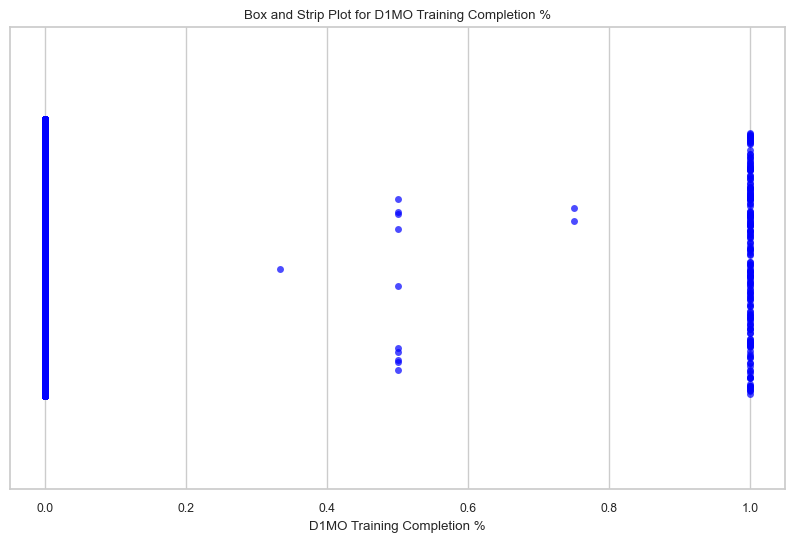

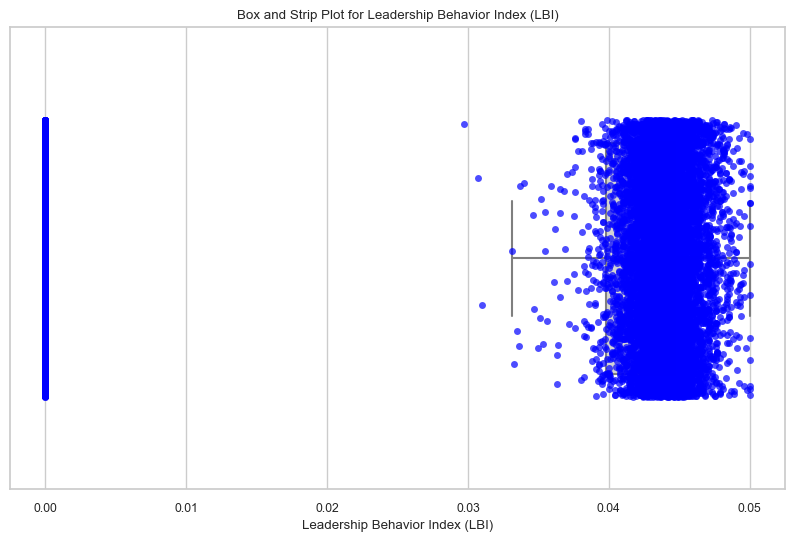

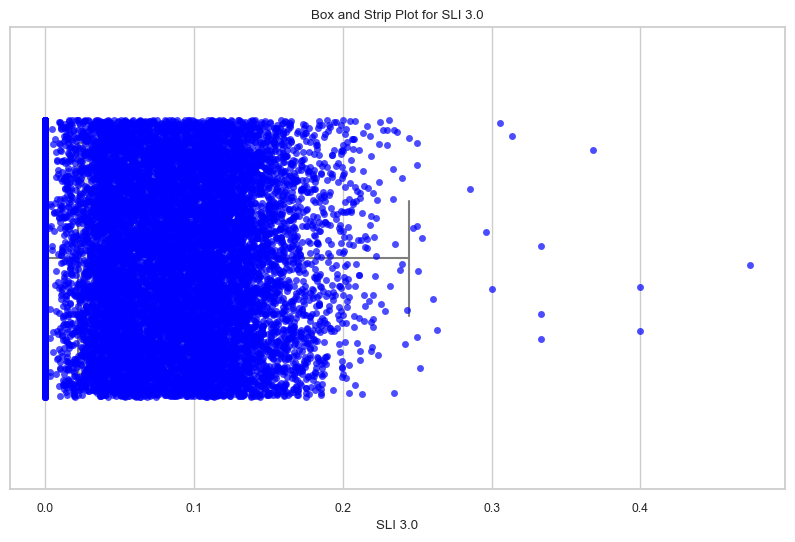

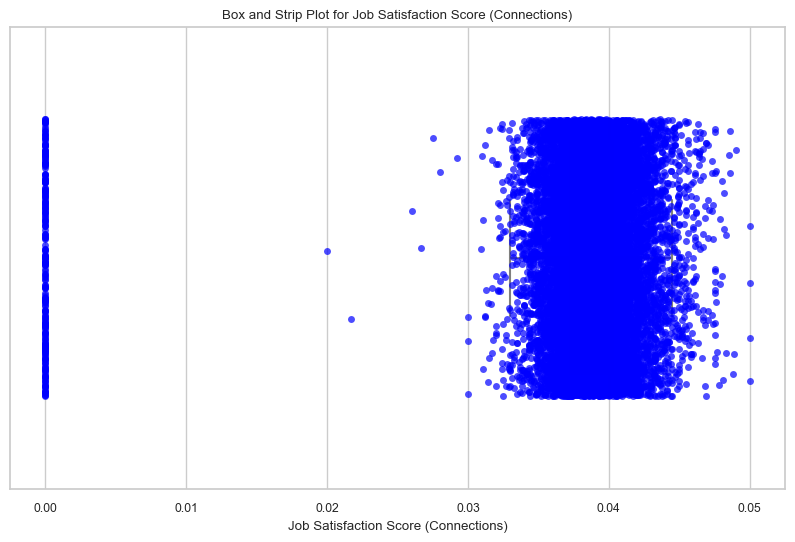

In [7]:
# Setting Seaborn aesthetics
sns.set_style("whitegrid")

features = df.columns

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plotting box plot with adjusted width and fliersize (to hide outliers as we are using strip plot)
    sns.boxplot(data=df, x=feature, color='lightgray', width=0.5, fliersize=0)
    
    # Overlaying with strip plot with adjusted marker size and jitter
    sns.stripplot(data=df, x=feature, jitter=0.3, marker='o', edgecolor="gray", alpha=0.7, color='blue')
    
    plt.title(f'Box and Strip Plot for {feature}')
    plt.show()

C:\Users\havenkai\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\havenkai\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\havenkai\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


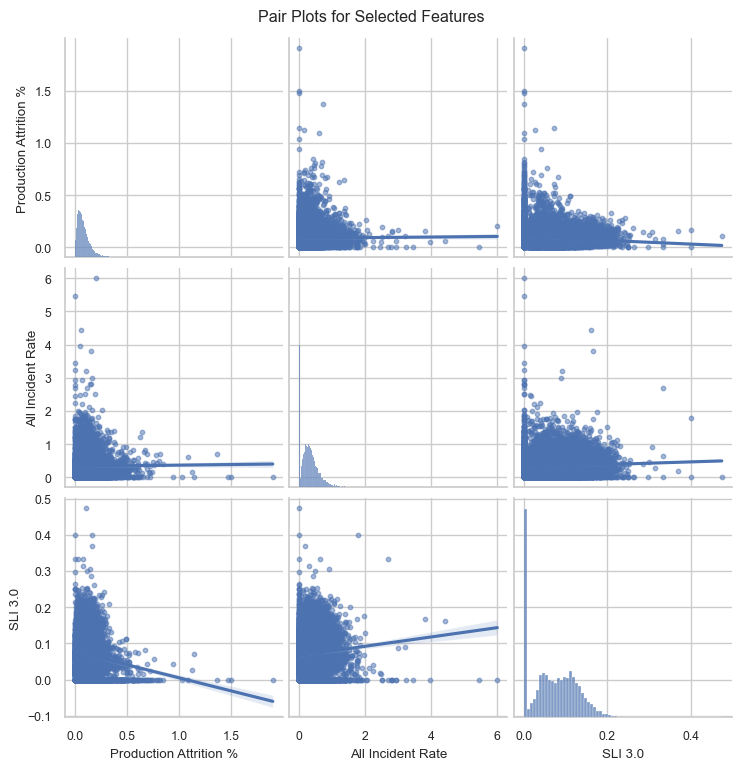

Year Month                                   0
Production Attrition %                       0
Production Attrition % (0-45 days tenure)    1
Production AA Attrition %                    0
Production SA Attrition %                    1
Unregretted Attrition %                      0
Job Abandonment %                            0
Production Negative UPT %                    0
LBI - Effective Communication                2
LBI - Competence and Decision Making         2
LBI - Empowering Employees                   2
Leadership Opportunity Index(LOI)            3
All Incident Rate                            0
D1MO Training Completion %                   4
Leadership Behavior Index (LBI)              2
SLI 3.0                                      1
Job Satisfaction Score (Connections)         1
dtype: int64


In [8]:
# Setting Seaborn aesthetics
sns.set_style("whitegrid")
#Replaced 3 old columns to 3 new ones$
subset_features = ["Production Attrition %", "All Incident Rate", "SLI 3.0"]  # we can adjust this list/columns
# pair plot with histograms and regression lines
sns.pairplot(df[subset_features], kind='reg', diag_kind='hist', palette='pastel', plot_kws={'scatter_kws': {'s': 10, 'alpha': 0.5}}, diag_kws={'alpha': 0.7})
plt.suptitle('Pair Plots for Selected Features', y=1.02)  
plt.show()
print(df.isnull().sum())
# Filling NaNs with mean
df.fillna(df.mean(), inplace=True)

In [9]:
# Regression Analysis

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Identify missing columns
missing_columns = [col for col in features if col not in df.columns]
# Remove missing columns from features
features = [col for col in features if col not in missing_columns]
X = df[features]
# Clean and convert 'SLI 3.0'$
def convert_experience(value):
    if isinstance(value, str) and '%' in value:
        return float(value.rstrip('%')) / 100.0
    elif isinstance(value, (float, int)):
        return value
    else:
        return np.nan
# Ensure column exists before modifying$
if 'SLI 3.0' in df.columns:
    df['SLI 3.0'] = df['SLI 3.0'].apply(convert_experience)

# Normalize column names$
df_normed = Book1_inputs_and_output_norm_df.rename(columns={
    'Year Month': 'Year_Month',
    'Production Attrition %': 'Production_Attrition_PCT',
    'Production Attrition % (0-45 days tenure)': 'Production_Attrition_0_45_days_tenure',
    'Production AA Attrition %': 'Production_AA_Attrition_PCT',
    'Production SA Attrition %': 'Production_SA_Attrition_PCT',
    'Unregretted Attrition %': 'Unregretted_Attrition_PCT',
    'Job Abandonment %': 'Job_Abandonment_PCT',
    'Production Negative UPT %': 'Production_Negative_UPT_PCT',
    'LBI - Effective Communication': 'LBI_Effective_Communication',
    'LBI - Competence and Decision Making': 'LBI_Competence_and_Decision_Making',
    'LBI - Empowering Employees': 'LBI_Empowering_Employees',
    'Leadership Opportunity Index(LOI)': 'Leadership_Opportunity_Index',
    'All Incident Rate': 'All_Incident_Rate',
    'D1MO Training Completion %': 'D1MO_Training_Completion',
    'Leadership Behavior Index (LBI)': 'Leadership_Behavior_Index',
    'SLI 3.0': 'SLI3_PCT',
    'Job Satisfaction Score (Connections)': 'Job_Satisfaction_Score'
})
 
# Fill NaN$
df_normed = df_normed.fillna(df_normed.mean(numeric_only=True))

#df_normed = df_normed.fillna(df_normed.mean())

In [10]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# Simple Linear Regression Loop
#Replaced old columns with new ones$
features = df_normed.columns.difference(['Production_Attrition_PCT', 'Production_Negative_UPT_PCT', 'All_Incident_Rate', 'Year_Month'])
 
with open('Regression_Result_on_Attrition.txt', 'w', encoding='utf-8') as f:
    for feature in features:
        x = df_normed[[feature]]
#Replaced 'Attendance' to 'Production_Attrition_PCT'$
        y = df_normed['Production_Attrition_PCT']
        x = sm.add_constant(x)
        model = sm.OLS(y, x).fit()
        f.write(f"\n\nRegression Analysis of {feature} and Attrition\n\n")
        f.write(str(model.summary()))

        
# Multiple Linear Regression

#Replaced 'HMD_PRR' & 'Attrition' to 'SLI3_PCT' & 'Production_Attrition_PCT'$
x1 = sm.add_constant(df_normed[['SLI3_PCT']])
y1 = df_normed['Production_Attrition_PCT']
model_M = sm.OLS(y1, x1).fit()
print(model_M.summary())
 

# Logistic Regression

# Create binary target for logistic regression
#Added a new logic - Depedency column to generate model_lin$ 
df['Attrition_High'] = (df['Production Attrition %'] > df['Production Attrition %'].median()).astype(int)
 
features = df_normed.columns.difference(['Production_Attrition_PCT'])
print(features)
formula = 'Production_Attrition_PCT ~ ' + ' + '.join(features)
model_lin = smf.ols(formula=formula, data=df_normed).fit()
print(model_lin.summary())

                               OLS Regression Results                               
Dep. Variable:     Production_Attrition_PCT   R-squared:                       0.013
Model:                                  OLS   Adj. R-squared:                  0.012
Method:                       Least Squares   F-statistic:                     190.5
Date:                      Tue, 13 May 2025   Prob (F-statistic):           4.61e-43
Time:                              09:55:58   Log-Likelihood:                -21189.
No. Observations:                     15000   AIC:                         4.238e+04
Df Residuals:                         14998   BIC:                         4.240e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [11]:
#Basic Time Series
from statsmodels.tsa.api import SimpleExpSmoothing

# Assume 'VariableName' is the column you want to forecast
data = df['Production Attrition %']

# Fit the model
model = SimpleExpSmoothing(data).fit()

# Forecast for next 10 periods
forecast = model.forecast(10)
print(forecast)

15000    0.112286
15001    0.112286
15002    0.112286
15003    0.112286
15004    0.112286
15005    0.112286
15006    0.112286
15007    0.112286
15008    0.112286
15009    0.112286
dtype: float64


In [12]:
#time series forecasting

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
df = pd.read_csv('C:\\Users\\havenkai\\Documents\\People Analytics Scorecard\\Book1.csv')

df['Attendance'] = df['Attendance'].astype(str).str.rstrip('%').astype('float') / 100.0
df['Attendance'].fillna(method='ffill', inplace=True)

attendance_series = df['Attendance']

# ARIMA
model = ARIMA(attendance_series, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5) # forecasting the next 5 points

print(forecast)

C:\Users\havenkai\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8920    0.008404
8921    0.008239
8922    0.008378
8923    0.008297
8924    0.008268
Name: predicted_mean, dtype: float64


In [19]:
#random forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('C:\\Users\\havenkai\\Documents\\People Analytics Scorecard\\Book1.csv')

#Added the following 3 lines for data cleanup$
df['Attrition'].replace('#N/A', 0, inplace=True)
df['Attrition'].fillna(0, inplace=True)
df['Attrition'] = pd.to_numeric(df['Attrition'], errors='coerce').fillna(0).astype(int)
 
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Attrition':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

#Added the following line for data cleanup$        
X = df.drop('Attrition', axis=1).fillna(0)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
 
# Make predictions
y_pred = clf.predict(X_test)
 
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1784

    accuracy                           1.00      1784
   macro avg       1.00      1.00      1.00      1784
weighted avg       1.00      1.00      1.00      1784



In [ ]:
import pandas as pd

# Get correlation coefficients with Production Attrition %
correlations = Book1_inputs_norm_df_corr['Production Attrition %'].sort_values(ascending=False)

# Create a dictionary mapping metrics to their correlation coefficients
correlation_dict = {
    'Production Attrition % (0-45 days tenure)': correlations['Production Attrition % (0-45 days tenure)'],
    'Production AA Attrition %': correlations['Production AA Attrition %'],
    'Production SA Attrition %': correlations['Production SA Attrition %'],
    'Unregretted Attrition %': correlations['Unregretted Attrition %'],
    'Job Abandonment %': correlations['Job Abandonment %'],
    'Production Negative UPT %': correlations['Production Negative UPT %'],
    'SLI 3.0': correlations['SLI 3.0'],
    'Leadership Opportunity Index(LOI)': correlations['Leadership Opportunity Index(LOI)'],
    'All Incident Rate (AIR)': correlations['All Incident Rate'],
    'D1MO Training Completion %': correlations['D1MO Training Completion %'],
    'Job Satisfaction Score (Connections)': correlations['Job Satisfaction Score (Connections)']
}

# Print formatted correlations
for metric, corr in correlation_dict.items():
    print(f"{metric}: {corr:.3f}")